<a href="https://colab.research.google.com/github/Vagarh/University-specialization-in-analytics-and-big-data-IU-DIGITAL/blob/main/basic_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping**

Conectándose a una página y leyendo su contenido

In [ ]:
from urllib.request import urlopen

html = urlopen("https://www.goodreads.com/choiceawards/best-fiction-books-2022") #Se hace conexión a la página web objetivo

In [ ]:
from urllib.request import urlopen

html = urlopen("https://www.goodreads.com/choiceawards/best-fiction-books-2022") #Se hace conexión a la página web objetivo
print(html.read()) #El método read() lee el contenido del archivo html relacionado a la página web. Retorna la representación textual de la página, así que no contiene contenidos multimedia

b'<!DOCTYPE html>\n<html class="desktop withSiteHeaderTopFullImage\n">\n<head>\n  <title>Best Fiction 2022 \xe2\x80\x94 Goodreads Choice Awards</title>\n\n<meta content=\'telephone=no\' name=\'format-detection\'>\n<meta property="keywords" content="Best books 2022, top books 2022, 2022 Goodreads Choice Awards, votes, ratings, book reviews" />\n<meta content=\'2415071772\' property=\'fb:app_id\'>\n<meta content=\'Announcing the Goodreads Choice Winner in Best Fiction!\' property=\'og:title\'>\n<meta content=\'https://images.gr-assets.com/misc/1668548310-1668548310_goodreads_misc.png\' property=\'og:image\'>\n<meta content=\'Congratulations to our winners in 17 categories! The Goodreads Choice Awards are the only major book awards decided by readers.\' property=\'og:description\'>\n<meta content=\'https://www.goodreads.com/choiceawards/best-fiction-books-2022\' property=\'og:url\'>\n<meta content=\'Goodreads\' property=\'og:site_name\'>\n\n\n\n\n  \n  <!-- * Copied from https://info.anal

Usando la librería BeautifulSoup



> Con la librer BeautifulSoup convertimos el contenido html recuperado con la librería urllib a un objeto que podemos recorrer y explorar.


> La estructura de este nuevo objeto representa el contenido html así:

```
*   html --> <html><head>...</head><body>...</body></html>
  *   head --> <head><title> ...Título página...</title></head>
    *   title --> <title>...Título página...</title>
  *   body --> <body><h1>...Título cuerpo...</h1><div>...Sección...</div></body>
    *   h1--> <h1>...Título cuerpo...</h1>
    *   div ---> <div>...Sección...</div>
```



> Se debe tener en cuenta que todas las páginas no contienen la misma distribución ni los mismos contenidos. Sin embargo, su contenido y estructura sí está delimitada por el mismo tipo de etiquetas y artefactos de html.

***Revisa las etiquetas de html aquí***: https://developer.mozilla.org/en-US/docs/Web/HTML/Element









In [ ]:
*   html --> <html><head>...</head><body>...</body></html>
  *   head --> <head><title> ...Título página...</title></head>
    *   title --> <title>...Título página...</title>
  *   body --> <body><h1>...Título cuerpo...</h1><div>...Sección...</div></body>
    *   h1--> <h1>...Título cuerpo...</h1>
    *   div ---> <div>...Sección...</div>

# **Ejemplo 1**

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://www.goodreads.com/choiceawards/best-fiction-books-2022") #Se hace conexión a la página web objetivo
objeto_bs = BeautifulSoup(html.read()) #Se crea un objeto de tipo BeautifulSoup para posteriormente analizar el contenido de la página html recuperada en la línea anterior
print(objeto_bs.h1) #Se extrae un elemento con la etiqueta "h1" dentro de la información recuperada

<h1>2022 Rules &amp; Eligibility</h1>


In [ ]:
dir(objeto_bs)

['ASCII_SPACES',
 'DEFAULT_BUILDER_FEATURES',
 'DEFAULT_INTERESTING_STRING_TYPES',
 'NO_PARSER_SPECIFIED_WARNING',
 'ROOT_TAG_NAME',
 '__bool__',
 '__call__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_strings',
 '_decode_markup',
 '_feed',
 '_find_all',
 '_find_one',
 '_is_xml',
 '_lastRecursiveChild',
 '_last_descendant',
 '_linkage_fixer',
 '_markup_is_url',
 '_markup_resembles_filename',
 '_most_recent_element',
 '_namespaces',
 '_popToTag',
 '_should_pretty_print',
 'append',
 'attrs',
 'builder',
 'can_

Si bien el elemento "h1" es común en la mayoría de páginas web, algunas no tienen esta etiqueta ya que presentan su contenido de otra manera. Por esto, es importante gestionar los posibles flujos de nuestro programa agregando manejo de excepciones.


> En esta sección nos enfocaremos en extraer información sobre vídeos de youtube enfocados en web scraping. De estos vídeos capturaremos cierta información como título, autor, visualizaciones y tiempo de subido. En este ejemplo, verán que no hay etiquetas del tipo "h1", sin embargo, nos enfocaremos en otro tipo de contenido.



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://www.youtube.com/results?search_query=web+scraping+python") #Se hace conexión a la página web objetivo
objeto_bs = BeautifulSoup(html.read()) #Se crea un objeto de tipo BeautifulSoup para posteriormente analizar el contenido de la página html recuperada en la línea anterior
print(objeto_bs.h1) #Se extrae un elemento con la etiqueta "h1" dentro de la información recuperada

None


Como vimos en el ejemplo anterior, en esta nueva página web objetivo (youtube - vídeos sobre web scraping), no se encontró ninguna etiqueta h1, así que en el atributo "h1" de "objeto_bs" no se almacenó ningún valor --> resultado None.



> En el siguiente ejemplo, aprendemos a controlar posibles errores básicos como que la url no exista o se esté intentando buscar un atributo errado sobre el objeto_bs. Este procedimiento es muy importante ya que permite que nuestro scraper continue recuperando información de la web, omitiendo los posibles errores de este tipo que puedan surgir a partir de ciertas páginas objetivo que no cumplan con las restricciones de los datos que buscamos.


> En este ejemplo, nos encontramos con el mismo problema ya que el elemento "h1" no existe. Sin embargo, controlamos el flujo y enviamos un mensaje avisando del problema. En un caso más complejo, donde estemos evaluando múltiples páginas, podríamos simplemente omitir la página, agregar un valor por defecto o definir un flujo alternativo para continuar con las otras páginas objetivo y así, permitirle al scraper continuar con la búsqueda de información.









In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

def get_titulo(url):
  try:
    html = urlopen(url)
  except HTTPError as e:
    print("No se encontró la página")
    return None
  try:
    objeto_bs = BeautifulSoup(html.read())
    titulo = objeto_bs.body.h1
  except AttributeError as e:
    return None
  return titulo

titulo = get_titulo("https://www.youtube.com/results?search_query=web+scraping+python")
if(titulo is None):
  print("No hay título en esta página")
else:
  print(titulo)

No hay título en esta página


# **Ejemplo 2**

En el siguiente ejemplo analizaremos la página principal del top de ciencia ficción de goodreads y extraeremos todas las url que encontremos en la página. Hacer este procedimiento de manera manual nos podría tomar mucho tiempo: tendríamos que analizar la página tanto a nivel visual como a nivel de código y registrar cada una de las url que vamos encontrando. Sin embargo, con la ayuda del WS podemos automatizar este proceso y optimizar el manejo de recursos.






In [ ]:
'''
Cabe anotar que este proceso lo hacemos en una celda separada ya que la carga
del contenido puede ser un proceso demandante cuando trabajamos con páginas que
incluyen muchos datos.

Por otra parte, noten que no estamos usando los controles de flujo orientados a
manejo de excepciones. En este ejemplo no los usamos porque tenemos una ambiente
muy controlado orientado a una tarea muy simple.
'''

#Extrayendo urls
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.goodreads.com/choiceawards/best-fiction-books-2022" #url página principal IUDigital
contenido_html = urlopen(url) #Extraemos el contenido html de la página
objeto_bs = BeautifulSoup(contenido_html.read()) #Creamos un objeto de BeautifulSoup para analizar el contenido html


En HTML, la etiqueta "a" (anchor) se usa para referenciar un enlace a otra parte de la página, otras páginas o cualquier URL. Esta etiqueta puede tener varios atributos. En nuestro caso, nos interesa conocer todas las etiquetas de tipo "a" que se encuentren en el contenido HTML y de cada una de ellas, nos interesa el valor del atributo "href", que es donde se guarda el valor del enlace. Ejecuta y analiza el siguiente ejemplo:

In [ ]:
#Código 14
#Ejemplo todas las URL de la página
enlaces = []

for link in objeto_bs.find_all('a'):
    enlace = link.get('href')
    if(enlace and len(enlace)>2):
      enlaces.append(enlace)
      print(enlace)

print(f"\nLa cantidad de enlaces encontrados fue: {len(enlaces)}")

https://www.goodreads.com/blog/show/2491-90-recent-books-to-read-this-native-american-heritage-month?ref=nativeamerican2023_eb
/?ref=nav_home
/review/list?ref=nav_mybooks
/book?ref=nav_brws
/recommendations?ref=nav_brws_recs
/choiceawards?ref=nav_brws_gca
/genres?ref=nav_brws_genres
/giveaway?ref=nav_brws_giveaways
/book/popular_by_date/2023/11?ref=nav_brws_newrels
/list?ref=nav_brws_lists
/book?ref=nav_brws_explore
/news?ref=nav_brws_news
/genres/art
/genres/biography
/genres/business
/genres/children-s
/genres/christian
/genres/classics
/genres/comics
/genres/cookbooks
/genres/ebooks
/genres/fantasy
/genres/fiction
/genres/graphic-novels
/genres/historical-fiction
/genres/history
/genres/horror
/genres/memoir
/genres/music
/genres/mystery
/genres/non-fiction
/genres/poetry
/genres/psychology
/genres/romance
/genres/science
/genres/science-fiction
/genres/self-help
/genres/sports
/genres/thriller
/genres/travel
/genres/young-adult
/genres
/group?ref=nav_comm
/group?ref=nav_comm_groups

# **Ejemplo 3**

Extracción de títulos de libros en el top de ficción

In [ ]:
elementos_padre = objeto_bs.find_all("a",{"class":"pollAnswer__bookLink"})
titulos = []

def beautify_title(title):
  idx = title.index("by")
  return title[:idx]

for elemento in elementos_padre:
  img_tag = elemento.find("img")
  title = img_tag["alt"]
  print(beautify_title(title))


Tomorrow, and Tomorrow, and Tomorrow 
Wish You Were Here 
The Winners 
Remarkably Bright Creatures 
The Hotel Nantucket 
Our Missing Hearts 
Cleopatra and Frankenstein 
To Paradise 
Other Birds 
Notes on an Execution 
Mad Honey 
Olga Dies Dreaming 
This Time Tomorrow 
Demon Copperhead 
True Biz 
Nightcrawling 
Lucy 
Honor 
How Not to Drown in a Glass of Water 
Now Is Not the Time to Panic 


# **Extracción de datos de Rotten Tomatoes**
Extracción de datos del top 100 de películas de cada año según su crítica.

Enlace: https://www.rottentomatoes.com/top/bestofrt/?year=2021 --> Note que en la URL podemos definir el año del top100 que queremos ver.

Datos a extraer:



*   Rank: puesto en el top 100
*   Rating: calificación de la crítica
*   Title: título de la película
*   No. of Reviews: número de reseñas para esta película

Después extraeremos otros datos a partir de la información recuperada como año de la película y polaridad o sentimiento del título.





In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

def load_content(url):
  content = urlopen(url) #Se conecta a url y se carga el contenido crudo
  bs = BeautifulSoup(content.read()) #Se transforma el contenido crudo leído
  return bs #Objeto de BeautifulSoup


In [ ]:
#Funciones de orden superior

g = lambda x: x+1
g(5)

6

In [ ]:
def scrape_movie_data(url):
  movie_url_content = load_content(url)
  movie_synopsis = movie_url_content.find("p",{"data-qa":"movie-info-synopsis"}).get_text()

  return movie_synopsis.strip()

def scraper(bs_object):
  raw_data = []
  movie_imgs = bs_object.findAll("img",{"class":"posterImage"})
  titles = [movie["alt"] for movie in movie_imgs]

  single_urls = bs_object.findAll("a",{"data-track":"scores"})
  single_urls = [url["href"] for url in single_urls]
  base_url = "https://www.rottentomatoes.com"
  single_urls = list(map(lambda x: base_url+x, single_urls))


  scores = bs_object.findAll("score-pairs-deprecated")
  scores = [(score["audiencescore"], score["criticsscore"]) for score in scores]

  sinopsis = list(map(scrape_movie_data, single_urls))
  data = list(zip(titles, single_urls, scores, sinopsis))

  return data



bs_object = load_content("https://www.rottentomatoes.com/browse/movies_at_home/sort:popular")
data = scraper(bs_object)

In [ ]:
data

[("Five Nights at Freddy's",
  'https://www.rottentomatoes.com/m/five_nights_at_freddys',
  ('88', '29'),
  "The film follows a troubled security guard as he begins working at Freddy Fazbear's Pizza. While spending his first night on the job, he realizes the night shift at Freddy's won't be so easy to make it through."),
 ('Pain Hustlers',
  'https://www.rottentomatoes.com/m/pain_hustlers',
  ('69', '23'),
  'Liza Drake (Emily Blunt) is a blue-collar single mom who has just lost her job and is at the end of her rope. A chance meeting with pharmaceutical sales rep Pete Brenner (Chris Evans) puts her on an upwards trajectory economically but dubious path ethically as she becomes entangled in a dangerous racketeering scheme. Dealing with her increasingly unhinged boss (Andy Garcia), the worsening medical condition of her daughter (Chloe Coleman), and a growing awareness of the devastation the company is causing forces Liza to examine her choices. Pain Hustlers is a sharp and revealing loo

#Creando dataframe y exportando datos

In [ ]:
import pandas as pd

dataframe = pd.DataFrame(data)
dataframe

,0,1,2,3
0,Reptile,https://www.rottentomatoes.com/m/reptile_2023,"(74, 42)",Following the brutal murder of a young real es...
1,Fair Play,https://www.rottentomatoes.com/m/fair_play_2023,"(51, 87)",When a coveted promotion at a cutthroat financ...
2,Totally Killer,https://www.rottentomatoes.com/m/totally_killer,"(80, 87)",Thirty-five years after the shocking murder of...
3,The Equalizer 3,https://www.rottentomatoes.com/m/the_equalizer_3,"(94, 75)",Since giving up his life as a government assas...
4,Talk to Me,https://www.rottentomatoes.com/m/talk_to_me_2023,"(82, 94)",When a group of friends discover how to conjur...
...,...,...,...,...
111,Smile,https://www.rottentomatoes.com/m/beau_is_afraid,"(77, 80)",A paranoid man embarks on an epic odyssey to g...
112,The Menu,https://www.rottentomatoes.com/m/doctor_sleep,"(76, 88)","Struggling with alcoholism, Dan Torrance remai..."
113,Muzzle,https://www.rottentomatoes.com/m/transformers_...,"(76, 17)",Returning to the action and spectacle that hav...
114,The Offering,https://www.rottentomatoes.com/m/the_mill_2023,"(48, 74)","In a near future hyper-capitalist America, Joe..."


In [ ]:
#Agregando nombres de columnas

dataframe.columns = ["title","url","scores","synopsis"]
dataframe

,title,url,scores,synopsis
0,Reptile,https://www.rottentomatoes.com/m/reptile_2023,"(74, 42)",Following the brutal murder of a young real es...
1,Fair Play,https://www.rottentomatoes.com/m/fair_play_2023,"(51, 87)",When a coveted promotion at a cutthroat financ...
2,Totally Killer,https://www.rottentomatoes.com/m/totally_killer,"(80, 87)",Thirty-five years after the shocking murder of...
3,The Equalizer 3,https://www.rottentomatoes.com/m/the_equalizer_3,"(94, 75)",Since giving up his life as a government assas...
4,Talk to Me,https://www.rottentomatoes.com/m/talk_to_me_2023,"(82, 94)",When a group of friends discover how to conjur...
...,...,...,...,...
111,Smile,https://www.rottentomatoes.com/m/beau_is_afraid,"(77, 80)",A paranoid man embarks on an epic odyssey to g...
112,The Menu,https://www.rottentomatoes.com/m/doctor_sleep,"(76, 88)","Struggling with alcoholism, Dan Torrance remai..."
113,Muzzle,https://www.rottentomatoes.com/m/transformers_...,"(76, 17)",Returning to the action and spectacle that hav...
114,The Offering,https://www.rottentomatoes.com/m/the_mill_2023,"(48, 74)","In a near future hyper-capitalist America, Joe..."


In [ ]:
#separando scores
dataframe["critic_score"] = dataframe["scores"].apply(lambda x: x[0])
dataframe["audience_score"] = dataframe["scores"].apply(lambda x: x[1])
dataframe.drop("scores", axis = 1, inplace=True)
dataframe

,title,url,synopsis,critic_score,audience_score
0,Reptile,https://www.rottentomatoes.com/m/reptile_2023,Following the brutal murder of a young real es...,74,42
1,Fair Play,https://www.rottentomatoes.com/m/fair_play_2023,When a coveted promotion at a cutthroat financ...,51,87
2,Totally Killer,https://www.rottentomatoes.com/m/totally_killer,Thirty-five years after the shocking murder of...,80,87
3,The Equalizer 3,https://www.rottentomatoes.com/m/the_equalizer_3,Since giving up his life as a government assas...,94,75
4,Talk to Me,https://www.rottentomatoes.com/m/talk_to_me_2023,When a group of friends discover how to conjur...,82,94
...,...,...,...,...,...
111,Smile,https://www.rottentomatoes.com/m/beau_is_afraid,A paranoid man embarks on an epic odyssey to g...,77,80
112,The Menu,https://www.rottentomatoes.com/m/doctor_sleep,"Struggling with alcoholism, Dan Torrance remai...",76,88
113,Muzzle,https://www.rottentomatoes.com/m/transformers_...,Returning to the action and spectacle that hav...,76,17
114,The Offering,https://www.rottentomatoes.com/m/the_mill_2023,"In a near future hyper-capitalist America, Joe...",48,74


In [ ]:
#reorganizando orden de las columnas --> no es inplace, así que se debe reasignar, es decir, dataframe = dataframe[...]

dataframe = dataframe[["title","synopsis","critic_score","audience_score","url"]]

In [ ]:
dataframe

,title,synopsis,critic_score,audience_score,url
0,Reptile,Following the brutal murder of a young real es...,74,42,https://www.rottentomatoes.com/m/reptile_2023
1,Fair Play,When a coveted promotion at a cutthroat financ...,51,87,https://www.rottentomatoes.com/m/fair_play_2023
2,Totally Killer,Thirty-five years after the shocking murder of...,80,87,https://www.rottentomatoes.com/m/totally_killer
3,The Equalizer 3,Since giving up his life as a government assas...,94,75,https://www.rottentomatoes.com/m/the_equalizer_3
4,Talk to Me,When a group of friends discover how to conjur...,82,94,https://www.rottentomatoes.com/m/talk_to_me_2023
...,...,...,...,...,...
111,Smile,A paranoid man embarks on an epic odyssey to g...,77,80,https://www.rottentomatoes.com/m/beau_is_afraid
112,The Menu,"Struggling with alcoholism, Dan Torrance remai...",76,88,https://www.rottentomatoes.com/m/doctor_sleep
113,Muzzle,Returning to the action and spectacle that hav...,76,17,https://www.rottentomatoes.com/m/transformers_...
114,The Offering,"In a near future hyper-capitalist America, Joe...",48,74,https://www.rottentomatoes.com/m/the_mill_2023


In [ ]:
#creando algunas columnas nuevas
dataframe["num_title_words"] = dataframe["title"].apply(lambda x: len(x.split(" ")))
dataframe["num_synopsis_words"] = dataframe["synopsis"].apply(lambda x: len(x.split(" ")))
dataframe

<ipython-input-35-e849dda2beb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["num_title_words"] = dataframe["title"].apply(lambda x: len(x.split(" ")))
<ipython-input-35-e849dda2beb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["num_synopsis_words"] = dataframe["synopsis"].apply(lambda x: len(x.split(" ")))


,title,synopsis,critic_score,audience_score,url,num_title_words,num_synopsis_words
0,Reptile,Following the brutal murder of a young real es...,74,42,https://www.rottentomatoes.com/m/reptile_2023,1,38
1,Fair Play,When a coveted promotion at a cutthroat financ...,51,87,https://www.rottentomatoes.com/m/fair_play_2023,2,110
2,Totally Killer,Thirty-five years after the shocking murder of...,80,87,https://www.rottentomatoes.com/m/totally_killer,2,96
3,The Equalizer 3,Since giving up his life as a government assas...,94,75,https://www.rottentomatoes.com/m/the_equalizer_3,3,79
4,Talk to Me,When a group of friends discover how to conjur...,82,94,https://www.rottentomatoes.com/m/talk_to_me_2023,3,33
...,...,...,...,...,...,...,...
111,Smile,A paranoid man embarks on an epic odyssey to g...,77,80,https://www.rottentomatoes.com/m/beau_is_afraid,1,26
112,The Menu,"Struggling with alcoholism, Dan Torrance remai...",76,88,https://www.rottentomatoes.com/m/doctor_sleep,2,71
113,Muzzle,Returning to the action and spectacle that hav...,76,17,https://www.rottentomatoes.com/m/transformers_...,1,51
114,The Offering,"In a near future hyper-capitalist America, Joe...",48,74,https://www.rottentomatoes.com/m/the_mill_2023,2,224


In [ ]:
#calculando polaridad de la sinopsis

import pandas as pd
import numpy as np
import spacy
from textblob import TextBlob


def analyze_polarity(critic):
  polarity = TextBlob(critic).sentiment.polarity
  return polarity

dataframe.loc[:,"synopsis_polarity"] = dataframe["synopsis"].apply(analyze_polarity)
dataframe

<ipython-input-39-7d1a8339236f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:,"synopsis_polarity"] = dataframe["synopsis"].apply(analyze_polarity)


,title,synopsis,critic_score,audience_score,url,num_title_words,num_synopsis_words,synopsis_polarity
0,Run Rabbit Run,"As a fertility doctor, Sarah has a firm unders...",24,38,https://www.rottentomatoes.com/m/run_rabbit_ru...,3,44,-0.016667
1,Nimona,"When Ballister Boldheart (Riz Ahmed), a knight...",94,93,https://www.rottentomatoes.com/m/nimona,1,120,0.021212
2,Leave No Trace,A father and daughter live a perfect but myste...,79,100,https://www.rottentomatoes.com/m/leave_no_trace,3,53,0.342045
3,Indiana Jones and the Kingdom of the Crystal S...,"It's the height of the Cold War, and famous ar...",53,77,https://www.rottentomatoes.com/m/indiana_jones...,9,83,0.225000
4,Take Care of Maya,When nine-year-old Maya Kowalski was admitted ...,95,92,https://www.rottentomatoes.com/m/take_care_of_...,4,94,0.050000
...,...,...,...,...,...,...,...,...
113,Armageddon Time,"With the imminent destruction of Krypton, thei...",48,75,https://www.rottentomatoes.com/m/superman_man_...,2,88,0.344444
114,What Is a Woman?,When it's discovered that the evil Emperor Pal...,86,75,https://www.rottentomatoes.com/m/star_wars_the...,4,69,-0.153409
115,Maybe I Do,Wildflower is a hilarious big-hearted celebrat...,61,36,https://www.rottentomatoes.com/m/wildflower_2022,3,30,0.248889
116,10x10,Linguistics professor Louise Banks (Amy Adams)...,23,67,https://www.rottentomatoes.com/m/arrival_2016,1,70,-0.051852


In [ ]:
#resumen básico
dataframe.describe()

,num_title_words,num_synopsis_words
count,116.000000,116.000000
mean,2.724138,71.663793
std,1.696986,39.008794
min,1.000000,16.000000
25%,1.750000,44.000000
50%,2.000000,68.000000
75%,3.250000,84.000000
max,9.000000,224.000000


In [ ]:
#Omitiendo chaning en el proceso de creación de nuevas columnas --> deepcopy
df2 = dataframe.copy(deep = True)
df2["xxx"] = df2["synopsis"].apply(analyze_polarity)
df2

,title,synopsis,critic_score,audience_score,url,num_title_words,num_synopsis_words,synopsis_polarity,xxx
0,Run Rabbit Run,"As a fertility doctor, Sarah has a firm unders...",24,38,https://www.rottentomatoes.com/m/run_rabbit_ru...,3,44,-0.016667,-0.016667
1,Nimona,"When Ballister Boldheart (Riz Ahmed), a knight...",94,93,https://www.rottentomatoes.com/m/nimona,1,120,0.021212,0.021212
2,Leave No Trace,A father and daughter live a perfect but myste...,79,100,https://www.rottentomatoes.com/m/leave_no_trace,3,53,0.342045,0.342045
3,Indiana Jones and the Kingdom of the Crystal S...,"It's the height of the Cold War, and famous ar...",53,77,https://www.rottentomatoes.com/m/indiana_jones...,9,83,0.225000,0.225000
4,Take Care of Maya,When nine-year-old Maya Kowalski was admitted ...,95,92,https://www.rottentomatoes.com/m/take_care_of_...,4,94,0.050000,0.050000
...,...,...,...,...,...,...,...,...,...
113,Armageddon Time,"With the imminent destruction of Krypton, thei...",48,75,https://www.rottentomatoes.com/m/superman_man_...,2,88,0.344444,0.344444
114,What Is a Woman?,When it's discovered that the evil Emperor Pal...,86,75,https://www.rottentomatoes.com/m/star_wars_the...,4,69,-0.153409,-0.153409
115,Maybe I Do,Wildflower is a hilarious big-hearted celebrat...,61,36,https://www.rottentomatoes.com/m/wildflower_2022,3,30,0.248889,0.248889
116,10x10,Linguistics professor Louise Banks (Amy Adams)...,23,67,https://www.rottentomatoes.com/m/arrival_2016,1,70,-0.051852,-0.051852


In [ ]:
#Exportando información

dataframe.to_csv("datos_rotten_tomatoes.csv")

#RETO:

* Extraer ambos tops desde: https://www.rottentomatoes.com/
* Mostrar plataformas donde se puede visualizar
  * esto está en la página individual de cada show

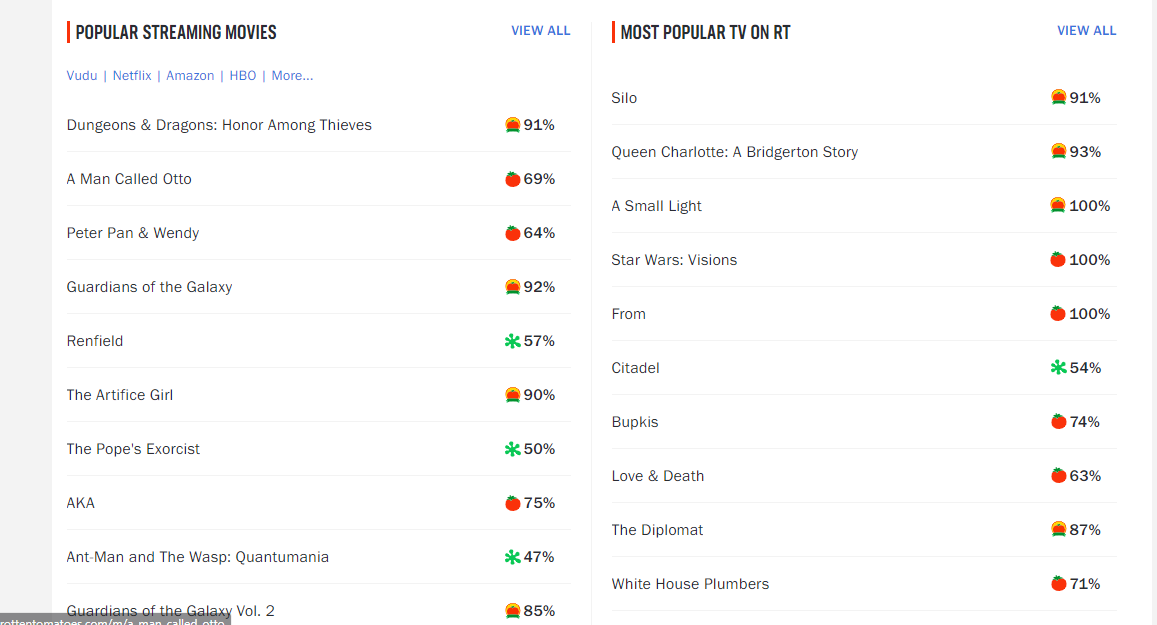

# Analizando la información extraída

In [ ]:
data = pd.read_csv("rotten.csv")
data

,Unnamed: 0,ranking,rating,title,num_reviews,synopsis,year,num_title_words,syno_polarity
0,0,1,0.98,Toy Story 3,309,With their beloved Andy preparing to leave for...,2010,3,0.305556
1,1,2,0.96,The Social Network,329,"In 2003, Harvard undergrad and computer genius...",2010,3,0.141077
2,2,3,0.99,How to Train Your Dragon,212,Hiccup (Jay Baruchel) is a Norse teenager from...,2010,5,-0.003409
3,3,4,0.95,True Grit,275,After an outlaw named Tom Chaney (Josh Brolin)...,2010,2,0.066667
4,4,5,0.94,The King's Speech,298,England's Prince Albert (Colin Firth) must asc...,2010,3,0.358333
...,...,...,...,...,...,...,...,...,...
1195,1195,96,0.88,Operation Varsity Blues: The College Admission...,51,Reenactments tell the story of the mastermind ...,2021,7,0.150000
1196,1196,97,0.86,Jakob's Wife,88,Anne is married to a small-town minister and f...,2021,2,0.068182
1197,1197,98,0.88,We're All Going to the World's Fair,40,Reality and fantasy begin to blur when a teen ...,2021,7,-0.200000
1198,1198,99,0.86,Come True,84,Looking for an escape from her recurring night...,2021,2,0.196591


In [ ]:
#forma
data.shape

(1200, 9)

In [ ]:
#tipos de datos
data.dtypes

Unnamed: 0           int64
ranking              int64
rating             float64
title               object
num_reviews          int64
synopsis            object
year                 int64
num_title_words      int64
syno_polarity      float64
dtype: object

In [ ]:
#eliminando columna
data = data.drop("Unnamed: 0", axis=1)
data.head()

,ranking,rating,title,num_reviews,synopsis,year,num_title_words,syno_polarity
0,1,0.98,Toy Story 3,309,With their beloved Andy preparing to leave for...,2010,3,0.305556
1,2,0.96,The Social Network,329,"In 2003, Harvard undergrad and computer genius...",2010,3,0.141077
2,3,0.99,How to Train Your Dragon,212,Hiccup (Jay Baruchel) is a Norse teenager from...,2010,5,-0.003409
3,4,0.95,True Grit,275,After an outlaw named Tom Chaney (Josh Brolin)...,2010,2,0.066667
4,5,0.94,The King's Speech,298,England's Prince Albert (Colin Firth) must asc...,2010,3,0.358333


In [ ]:
#eliminando duplicados
duplicados = data[data.duplicated()]
print(f"En este DataFrame hay {duplicados.shape} elementos duplicados")

En este DataFrame hay (0, 8) elementos duplicados


In [ ]:
#conteo básico
data.count()

ranking            1200
rating             1200
title              1200
num_reviews        1200
synopsis           1187
year               1200
num_title_words    1200
syno_polarity      1200
dtype: int64

In [ ]:
#descripción básica
data.describe()

,ranking,rating,num_reviews,year,num_title_words,syno_polarity
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,50.500000,0.924958,158.335000,2015.500000,3.007500,0.048423
std,28.878105,0.052413,110.617357,3.453492,2.041874,0.225637
min,1.000000,0.720000,40.000000,2010.000000,1.000000,-1.000000
25%,25.750000,0.890000,66.000000,2012.750000,2.000000,-0.050000
50%,50.500000,0.930000,122.000000,2015.500000,2.000000,0.030704
75%,75.250000,0.970000,227.000000,2018.250000,4.000000,0.156027
max,100.000000,1.000000,568.000000,2021.000000,14.000000,1.000000


In [ ]:
#analizando datos nulos
print(data.isnull().sum())

ranking             0
rating              0
title               0
num_reviews         0
synopsis           13
year                0
num_title_words     0
syno_polarity       0
dtype: int64


In [ ]:
#análisis filas con datos nulos
d = data[data["synopsis"].isnull()]
d

,ranking,rating,title,num_reviews,synopsis,year,num_title_words,syno_polarity
68,69,0.86,Red Riding Trilogy,57,NaN,2010,3,0.0
271,72,0.86,The Pirates! Band of Misfits,153,NaN,2012,5,0.0
433,34,0.98,Ernest & Célestine,81,NaN,2014,3,0.0
540,41,0.96,Jafar Panahi's Taxi,106,NaN,2015,3,0.0
634,35,1.00,O.J.: Made in America,53,NaN,2016,4,0.0
794,95,0.94,School Life,47,NaN,2017,2,0.0
953,54,0.98,Varda by Agnès,88,NaN,2019,3,0.0
965,66,0.98,Homecoming: A Film by Beyoncé,55,NaN,2019,5,0.0
998,99,0.96,It Must Be Heaven,49,NaN,2019,4,0.0
1067,68,0.93,Bacurau (Nighthawk),163,NaN,2020,2,0.0


In [ ]:
#eliminando datos nulos
data_completa = data.dropna()
data_completa

,ranking,rating,title,num_reviews,synopsis,year,num_title_words,syno_polarity
0,1,0.98,Toy Story 3,309,With their beloved Andy preparing to leave for...,2010,3,0.305556
1,2,0.96,The Social Network,329,"In 2003, Harvard undergrad and computer genius...",2010,3,0.141077
2,3,0.99,How to Train Your Dragon,212,Hiccup (Jay Baruchel) is a Norse teenager from...,2010,5,-0.003409
3,4,0.95,True Grit,275,After an outlaw named Tom Chaney (Josh Brolin)...,2010,2,0.066667
4,5,0.94,The King's Speech,298,England's Prince Albert (Colin Firth) must asc...,2010,3,0.358333
...,...,...,...,...,...,...,...,...
1195,96,0.88,Operation Varsity Blues: The College Admission...,51,Reenactments tell the story of the mastermind ...,2021,7,0.150000
1196,97,0.86,Jakob's Wife,88,Anne is married to a small-town minister and f...,2021,2,0.068182
1197,98,0.88,We're All Going to the World's Fair,40,Reality and fantasy begin to blur when a teen ...,2021,7,-0.200000
1198,99,0.86,Come True,84,Looking for an escape from her recurring night...,2021,2,0.196591


In [ ]:
#revisión básica datos nulos
print(data_completa.isnull().sum())

ranking            0
rating             0
title              0
num_reviews        0
synopsis           0
year               0
num_title_words    0
syno_polarity      0
dtype: int64


<Axes: xlabel='rating'>

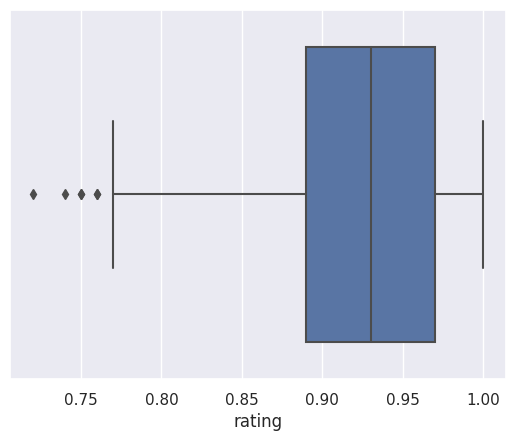

In [ ]:
#Importando las librerías de visualización
import seaborn as sns #Visualización
import matplotlib.pyplot as plt #Visualización
%matplotlib inline
sns.set(color_codes=True)

#analizando el rating
sns.boxplot(x=data_completa["rating"])

<Axes: xlabel='num_reviews'>

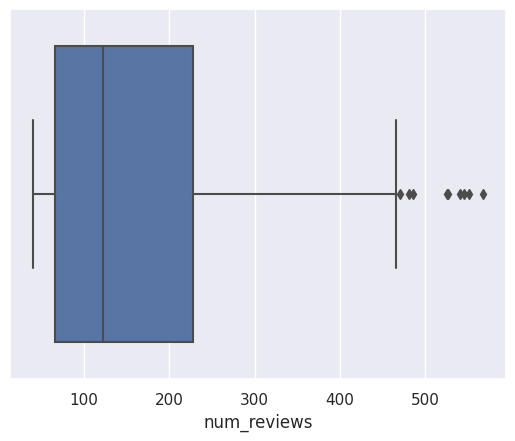

In [ ]:
sns.boxplot(x=data_completa["num_reviews"])

<Axes: xlabel='num_title_words'>

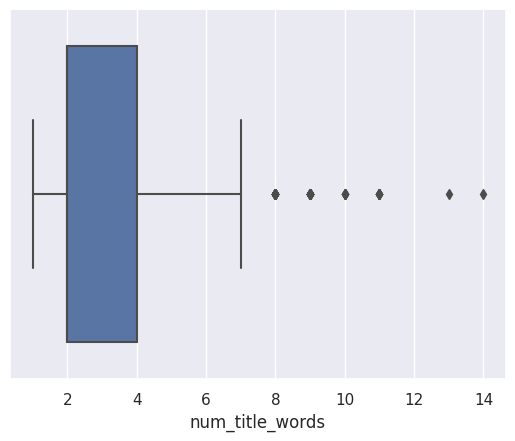

In [ ]:
sns.boxplot(x=data_completa["num_title_words"])

<Axes: xlabel='syno_polarity'>

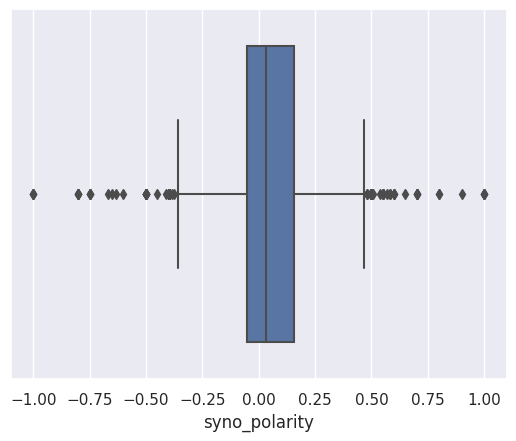

In [ ]:
sns.boxplot(x=data_completa["syno_polarity"])

Text(0.5, 0, 'Rating')

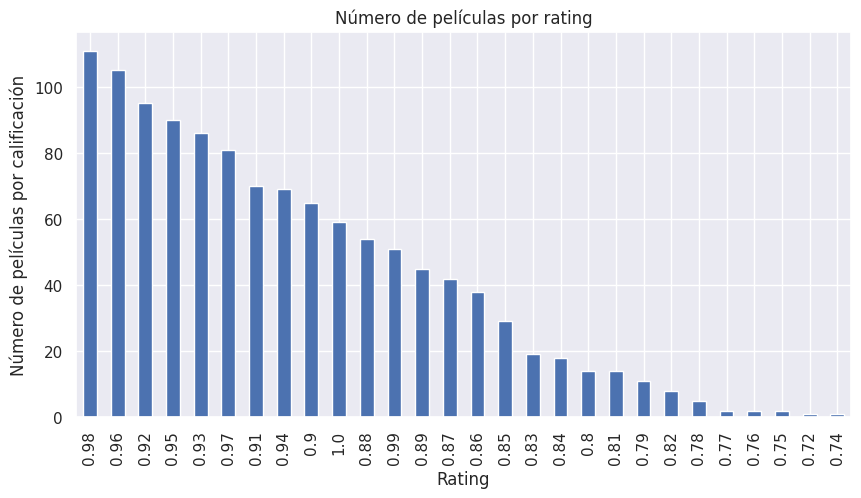

In [ ]:
data_completa.rating.value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Número de películas por rating")
plt.ylabel('Número de películas por calificación')
plt.xlabel('Rating')

<ipython-input-76-f5e55af0f5f3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = data_completa.corr()


                  ranking    rating  num_reviews      year  num_title_words  \
ranking          1.000000 -0.505255    -0.444402 -0.004850         0.046030   
rating          -0.505255  1.000000    -0.316176  0.344269         0.067493   
num_reviews     -0.444402 -0.316176     1.000000  0.088881        -0.124776   
year            -0.004850  0.344269     0.088881  1.000000         0.018389   
num_title_words  0.046030  0.067493    -0.124776  0.018389         1.000000   
syno_polarity   -0.056710  0.058579    -0.002085  0.031001         0.015563   

                 syno_polarity  
ranking              -0.056710  
rating                0.058579  
num_reviews          -0.002085  
year                  0.031001  
num_title_words       0.015563  
syno_polarity         1.000000  


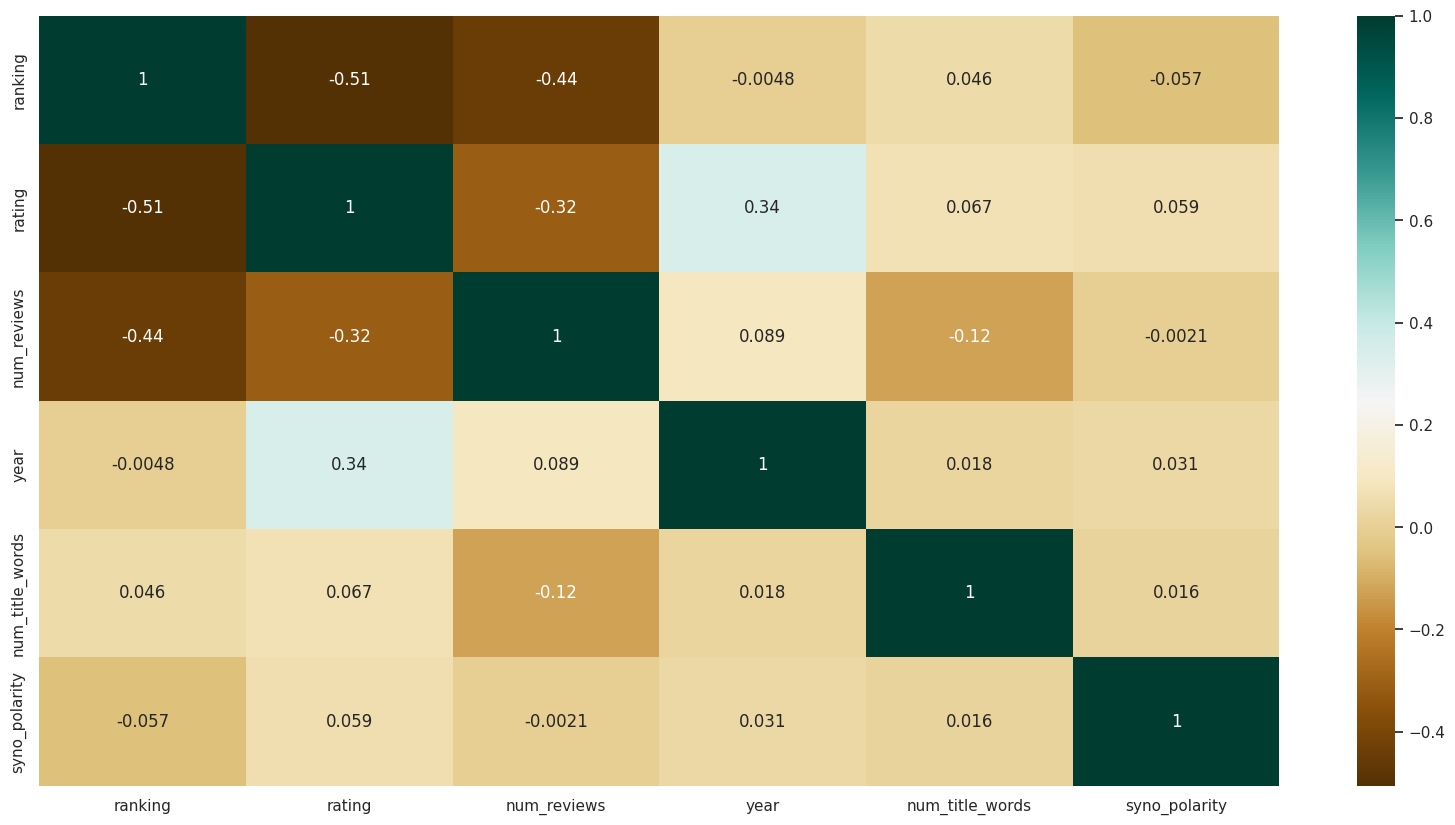

In [ ]:
#correlaciones
plt.figure(figsize=(20,10))
correlaciones = data_completa.corr()
sns.heatmap(correlaciones,cmap="BrBG",annot=True)
print(correlaciones)

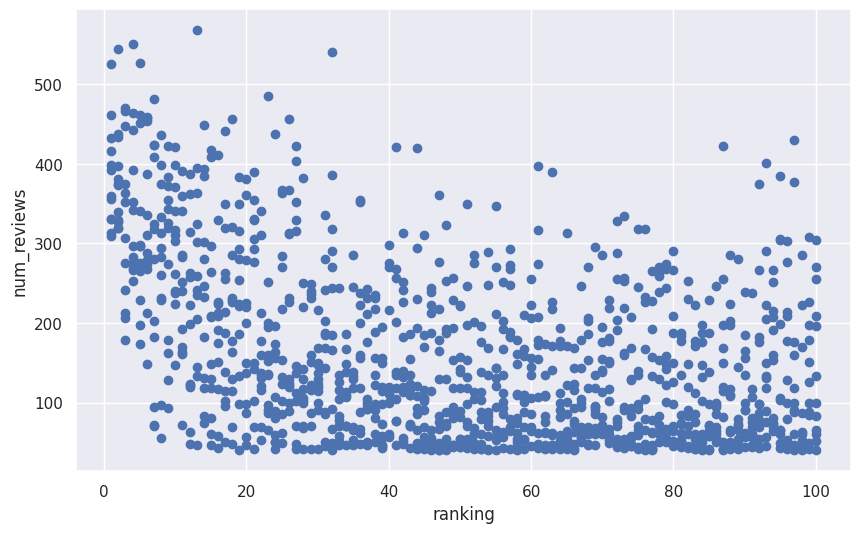

In [ ]:
#gráficos de dispersión
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(data_completa['ranking'], data_completa['num_reviews'])
ax.set_xlabel('ranking')
ax.set_ylabel('num_reviews')
plt.show()

In [ ]:
#análisis estadísticos básicos sobre una columna
data_completa.num_reviews.describe()

count    1187.000000
mean      159.117102
std       110.884862
min        40.000000
25%        66.000000
50%       123.000000
75%       227.500000
max       568.000000
Name: num_reviews, dtype: float64

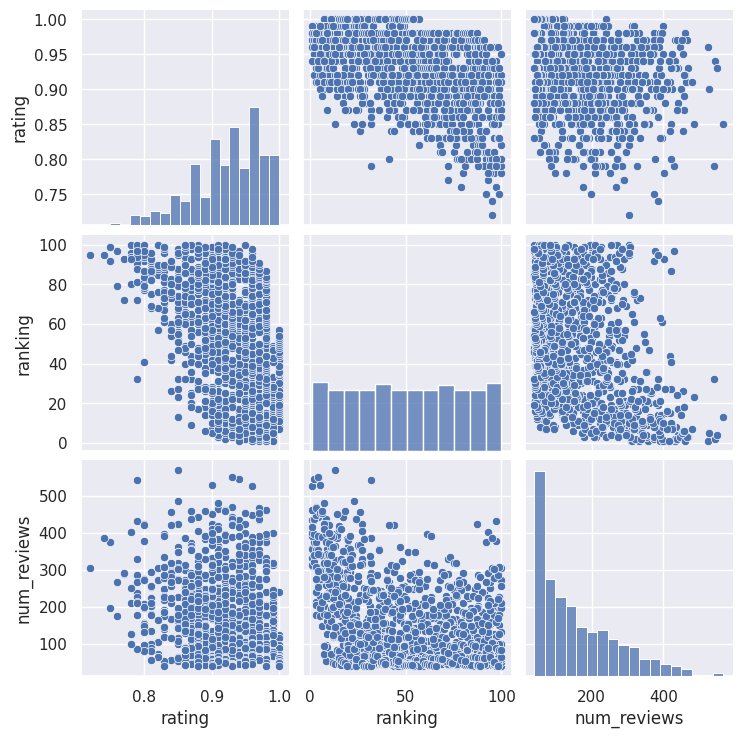

In [ ]:
#análisis multivariado
sns.pairplot(data = data_completa, vars = ['rating', 'ranking', 'num_reviews'])

In [ ]:
#Agrupamiento
data_completa.groupby('year')['rating'].mean()

year
2010    0.877879
2011    0.898900
2012    0.903636
2013    0.915200
2014    0.925152
2015    0.936667
2016    0.933939
2017    0.937475
2018    0.938900
2019    0.947010
2020    0.962083
2021    0.921400
Name: rating, dtype: float64

In [ ]:
data_completa.groupby('ranking')['rating'].mean()

ranking
1      0.970833
2      0.958333
3      0.966667
4      0.945833
5      0.951667
         ...   
96     0.866667
97     0.861667
98     0.880833
99     0.858182
100    0.858333
Name: rating, Length: 100, dtype: float64

# Usando headers para conexión web scraping

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

def load_content(url):
  header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36"}
  req = Request((url), headers=header)
  content = urlopen(req)
  bs = BeautifulSoup(content.read())
  return bs

In [ ]:
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&pageNumber=5

In [ ]:
base_url = "https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_xxx?ie=UTF8&reviewerType=all_reviews&pageNumber=xxx"
for i in range(1,6):
  new_url = base_url.replace("xxx",str(i))
  extraer_informacion(new_url)

https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.com/-/es/Cixin-Liu-ebook/product-reviews/B00R13OYU6/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&pageNumber=5


# Ejemplo con Homecenter

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

def load_content(url):
  header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36"}
  req = Request((url), headers=header)
  content = urlopen(req)
  bs = BeautifulSoup(content.read())
  return bs

In [ ]:
raw_data = load_content("https://www.homecenter.com.co/homecenter-co/product/222478/colchon-inflable-doble-2-almohadas-bomba-manual-191x137cm/222478/")
#raw_data = load_content("https://www.homecenter.com.co/homecenter-co/product/137251/carpa-iglu-dome-2-personas-colores-surtidos/137251/")
#raw_data = load_content("https://www.homecenter.com.co/homecenter-co/product/96012/carpa-belledonne-para-4-personas/96012/")
raw_data

In [ ]:
#find (el primero), find_all (todos en una lista), get_text (texto interno)
data = raw_data.find("div",{"id":"description"})
data

In [ ]:
product_name = raw_data.find("h1").get_text()
print(product_name)

# datos desde descripción
data_lists = data.find_all("p")
description = list(map(lambda x: x.get_text(),data_lists))
print(f"descripción: {description}")

Colchón Inflable Doble + 2 Almohadas + Bomba Manual 191x137cm
descripción: ['El Combo colchón con inflador Full + 2 almohadas Klimber\xa0es una conveniente opción para llevar el mejor confort a tus salidas al aire libre. Fabricado con un vinilo resistente y un Nylon flocado suave, este producto es capaz de brindarle un óptimo nivel de descanso a dos personas para que puedan tener un reposo sumamente placentero y reparador de la misma forma que si estuvieran en su casa.', 'Características del Combo colchón con Inflador Full + 2 almohadas Klimber: ', 'Además de su alta durabilidad, este colchón se destaca por su resistencia al agua, lo cual le garantiza una vida útil superior. También cabe destacar la inclusión de un práctico inflador manual de pie que posibilita un inflado veloz para que puedas hacer uso del producto muy rápidamente. A su vez, este modelo incorpora dos almohadas que te otorgarán una mayor comodidad a la hora de dormir.', 'Los beneficios del Combo colchón con inflador Fu

In [ ]:
len(description)

4

In [ ]:
table_data = raw_data.find_all("div",{"class":"row"})
len(table_data)

14

In [ ]:
def get_title_and_value(row):
  title = row.find("div",{"class":"title"}).get_text()
  value = row.find("div",{"class":"value"}).find("div").get_text()
  return (title, value)

In [ ]:
processed_table_data = []
for row in table_data:
  processed_table_data.append(get_title_and_value(row))

processed_table_data

[('Ancho', '137 cm'),
 ('Alto', '22 cm'),
 ('Largo', '191 cm'),
 ('Características',
  'Combo de colchón inflable más almohadas más bomba manual, ideal para paseos y camping.'),
 ('Color', 'Azul'),
 ('Tipo', 'Colchón inflable doble'),
 ('Material', 'PVC'),
 ('Uso', 'Exterior - interior'),
 ('Modelo', '12200'),
 ('Garantía', '1 mes'),
 ('Número de personas', '2'),
 ('Plegable', 'Si'),
 ('Capacidad de carga', '180 kg'),
 ('Sistema de inflado', 'Válvula externa de mano')]

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

def load_content(url):
  header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36"}
  req = Request((url), headers=header)
  content = urlopen(req)
  bs = BeautifulSoup(content.read())
  return bs

In [ ]:
bs = load_content("https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once")
data = bs.find_all("a",{"class":"bookTitle"})
data

In [ ]:
titles_urls = []
for book in data:
  url = f"https://www.goodreads.com{book['href']}"
  title = book.find("span").get_text()
  titles_urls.append((url, title))

In [ ]:
titles_urls

[('https://www.goodreads.com/book/show/2657.To_Kill_a_Mockingbird',
  'To Kill a Mockingbird'),
 ('https://www.goodreads.com/book/show/72193.Harry_Potter_and_the_Philosopher_s_Stone',
  'Harry Potter and the Philosopher’s Stone (Harry Potter, #1)'),
 ('https://www.goodreads.com/book/show/1885.Pride_and_Prejudice',
  'Pride and Prejudice'),
 ('https://www.goodreads.com/book/show/48855.The_Diary_of_a_Young_Girl',
  'The Diary of a Young Girl'),
 ('https://www.goodreads.com/book/show/170448.Animal_Farm', 'Animal Farm'),
 ('https://www.goodreads.com/book/show/157993.The_Little_Prince',
  'The Little Prince'),
 ('https://www.goodreads.com/book/show/61439040-1984', '1984'),
 ('https://www.goodreads.com/book/show/4671.The_Great_Gatsby',
  'The Great Gatsby'),
 ('https://www.goodreads.com/book/show/5107.The_Catcher_in_the_Rye',
  'The Catcher in the Rye'),
 ('https://www.goodreads.com/book/show/33.The_Lord_of_the_Rings',
  'The Lord of the Rings'),
 ('https://www.goodreads.com/book/show/19063.

In [ ]:
bs = load_content("https://www.goodreads.com/book/show/17245.Dracula")

In [ ]:
bs.find("span",{"class":"BookPageMetadataSection__genreButton"}).find("span").get_text()

'Classics'

In [ ]:
data = bs.find_all("div", {"data-testid":"title"})
data

[]

In [ ]:
bs.find_all("p",{"data-testid":"publicationInfo"})

[<p data-testid="publicationInfo">First published May 26, 1897</p>]

In [ ]:
b = bs.find_all("div", {"class":"BookActions"})
b[0].find_all("span", {"class":"Button__labelItem"})

[<span class="Button__labelItem">Want to read</span>,
 <span class="Button__labelItem"><i class="Icon ChevronIcon"><svg viewbox="0 0 24 24"><path d="M8.70710678,9.27397892 C8.31658249,8.90867369 7.68341751,8.90867369 7.29289322,9.27397892 C6.90236893,9.63928415 6.90236893,10.2315609 7.29289322,10.5968662 L12,15 L16.7071068,10.5968662 C17.0976311,10.2315609 17.0976311,9.63928415 16.7071068,9.27397892 C16.3165825,8.90867369 15.6834175,8.90867369 15.2928932,9.27397892 L12,12.3542255 L8.70710678,9.27397892 Z" transform="rotate(0 12 12)"></path></svg></i></span>,
 <span class="Button__labelItem">Kindle $2.99</span>,
 <span class="Button__labelItem"><i class="Icon ChevronIcon"><svg viewbox="0 0 24 24"><path d="M8.70710678,9.27397892 C8.31658249,8.90867369 7.68341751,8.90867369 7.29289322,9.27397892 C6.90236893,9.63928415 6.90236893,10.2315609 7.29289322,10.5968662 L12,15 L16.7071068,10.5968662 C17.0976311,10.2315609 17.0976311,9.63928415 16.7071068,9.27397892 C16.3165825,8.90867369 15.683417